
# What is JAX?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs and/or XLA offered by CPUs
-  Deep learning research community but via other supporting packages built on jax like Flax/Trax 

## Import the library

In [125]:
import jax
import jaxlib
import jaxlib.xla_extension as xe
from jax import numpy as jnp
import numpy as np

import flax
import flax.linen as nn


## Getting help in Jupyter

In [2]:
jnp.sqrt # <Tab>

<CompiledFunction of <function _one_to_one_unop.<locals>.<lambda> at 0x7fef49cb69d0>>

In [4]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
jnp.*array?

jnp.array
jnp.asanyarray
jnp.asarray
jnp.ascontiguousarray
jnp.asfarray
jnp.asfortranarray
jnp.ndarray

In [5]:
# Annotate your functions / classes!
flax.linen.Module?

Init signature: flax.linen.Module()
Docstring:     
Base class for all neural network modules. Layers and models should subclass this class.

All Flax Modules are Python 3.7
`dataclasses <https://docs.python.org/3/library/dataclasses.html>`_. Since
dataclasses take over ``__init__``, you should instead override :meth:`setup`,
which is automatically called to initialize the module.

Modules can contain submodules, and in this way can be nested in a tree
structure. Submodels can be assigned as regular attributes inside the
:meth:`setup` method.

You can define arbitrary "forward pass" methods on your Module subclass.
While no methods are special-cased, ``__call__`` is a popular choice because
it allows you to use module instances as if they are functions::

  from flax import linen as nn

  class Module(nn.Module):
    features: Tuple[int, ...] = (16, 4)

    def setup(self):
      self.dense1 = Dense(self.features[0])
      self.dense2 = Dense(self.features[1])

    def __call__(self, x

In [6]:
flax.linen.Module??

Init signature: flax.linen.Module()
Source:        
class Module:
  """Base class for all neural network modules. Layers and models should subclass this class.

  All Flax Modules are Python 3.7
  `dataclasses <https://docs.python.org/3/library/dataclasses.html>`_. Since
  dataclasses take over ``__init__``, you should instead override :meth:`setup`,
  which is automatically called to initialize the module.

  Modules can contain submodules, and in this way can be nested in a tree
  structure. Submodels can be assigned as regular attributes inside the
  :meth:`setup` method.

  You can define arbitrary "forward pass" methods on your Module subclass.
  While no methods are special-cased, ``__call__`` is a popular choice because
  it allows you to use module instances as if they are functions::

    from flax import linen as nn

    class Module(nn.Module):
      features: Tuple[int, ...] = (16, 4)

      def setup(self):
        self.dense1 = Dense(self.features[0])
        self.dense2 

## Dropping to Bash: magic!

In [7]:
# List all the files in the current directory
!ls -lh

total 20K
-rw-rw-r-- 1 ganesh ganesh 19K Jul 30 17:07 01-tensor_tutorial.ipynb


In [8]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

932 01-tensor_tutorial.ipynb


In [9]:
# Getting some general help
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [23]:
# Generate a tensor of size 2x3x4
key = jax.random.PRNGKey(0)
t = jax.random.normal(key=key, shape=(2, 3, 4))
type(t)

jaxlib.xla_extension.DeviceArray

In [24]:
# Get the size of the tensor
t.shape

(2, 3, 4)

In [25]:
# t.shape is a classic tuple =>
print('t shape:', ' \u00D7 '.join(map(str, t.shape)))

t shape: 2 × 3 × 4


In [26]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.size} dimensional space')
print(f'organised in {t.ndim} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [27]:
t

DeviceArray([[[ 0.36753944, -0.9082042 , -2.0064416 ,  0.16056262],
              [ 0.13233443, -1.305435  , -0.4055677 , -1.7935358 ],
              [-1.3566552 ,  0.80958456, -0.37977964,  0.08442838]],

             [[-1.895686  , -0.20993415,  0.20252012,  1.3713387 ],
              [-0.60032403, -1.0367845 ,  1.5410699 ,  0.05245331],
              [ 0.03026433,  1.3176132 ,  0.61566246,  1.698919  ]]],            dtype=float32)

In [29]:
# usually we don't want to do any inplace changes in flax, flax is pure functional

In [30]:
# This resizes the tensor permanently 
r = t.reshape(3, 8)


DeviceArray([[ 0.36753944, -0.9082042 , -2.0064416 ,  0.16056262,
               0.13233443, -1.305435  , -0.4055677 , -1.7935358 ],
             [-1.3566552 ,  0.80958456, -0.37977964,  0.08442838,
              -1.895686  , -0.20993415,  0.20252012,  1.3713387 ],
             [-0.60032403, -1.0367845 ,  1.5410699 ,  0.05245331,
               0.03026433,  1.3176132 ,  0.61566246,  1.698919  ]],            dtype=float32)

In [32]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
print(t.shape)
print(r.shape) 

(2, 3, 4)
(3, 8)


In [33]:
# to get zeros like a tensor
x = jnp.zeros_like(r)
print(x.shape)
print(x)


(3, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [34]:
# There is also a ones_like
y = jnp.ones_like(r)
print(y.shape)
print(y)

(3, 8)
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


## Vectors (1D Tensors)

In [36]:
# Creates a 1D tensor of integers 1 to 4
v = jnp.array([1, 2, 3, 4], dtype=jnp.float32)
v

DeviceArray([1., 2., 3., 4.], dtype=float32)

In [38]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.ndim}, size: {v.shape[0]}')

dim: 1, size: 4


In [40]:
w = jnp.array([1, 0, 2, 0], dtype=float)
w

DeviceArray([1., 0., 2., 0.], dtype=float32)

In [41]:
# Element-wise multiplication
v * w

DeviceArray([1., 0., 6., 0.], dtype=float32)

In [43]:
%%timeit
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

33.2 µs ± 362 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [50]:
# In-place replacement of random number from 0 to 10
key = jax.random.PRNGKey(seed=42)
x = jax.random.randint(key=key, shape=(5,), minval=0, maxval=10).astype(float)
x

DeviceArray([2., 3., 7., 9., 4.], dtype=float32)

In [51]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 2.0, last: 4.0


In [52]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

DeviceArray([3., 7.], dtype=float32)

In [53]:
v

DeviceArray([1., 2., 3., 4.], dtype=float32)

In [54]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = jnp.arange(1, 4 + 1)
v

DeviceArray([1, 2, 3, 4], dtype=int32)

In [60]:
# Square all elements in the tensor
print(jnp.power(v, 2), v)

[ 1  4  9 16] [1 2 3 4]


## Matrices (2D Tensors)

In [91]:
# Create a 2x4 tensor
m = jnp.array([[2, 5, 3, 7],
                  [4, 2, 1, 9]], dtype=float)
m

DeviceArray([[2., 5., 3., 7.],
             [4., 2., 1., 9.]], dtype=float32)

In [62]:
m.ndim

2

In [63]:
print(m.shape[0], m.shape[1], m.shape, sep=' -- ')

2 -- 4 -- (2, 4)


In [64]:
# Returns the total number of elements, hence num-el (number of elements)
m.size

8

In [65]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

DeviceArray(3., dtype=float32)

In [66]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

DeviceArray(3., dtype=float32)

In [67]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

DeviceArray([5., 2.], dtype=float32)

In [68]:
# Indexing column 1, all rows (returns size 2x1)
m[:, [1]]

DeviceArray([[5.],
             [2.]], dtype=float32)

In [69]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

DeviceArray([[2., 5., 3., 7.]], dtype=float32)

In [70]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

DeviceArray([2., 5., 3., 7.], dtype=float32)

In [71]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = jnp.arange(1., 4 + 1)
v

DeviceArray([1., 2., 3., 4.], dtype=float32)

In [72]:
m

DeviceArray([[2., 5., 3., 7.],
             [4., 2., 1., 9.]], dtype=float32)

In [73]:
# Scalar product
m @ v

DeviceArray([49., 47.], dtype=float32)

In [74]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

DeviceArray([49.], dtype=float32)

In [75]:
# Calculated by 
m[[1], :] @ v

DeviceArray([47.], dtype=float32)

In [76]:
# Add a random tensor of size 2x4 to m
m + jax.random.normal(key=jax.random.PRNGKey(0), shape=(2, 4))

DeviceArray([[ 2.0808678 ,  4.613753  ,  2.6243443 ,  8.668974  ],
             [ 2.7241802 ,  4.1192007 ,  0.14178777, 10.130593  ]],            dtype=float32)

In [77]:
# Subtract a random tensor of size 2x4 to m
m - jax.random.normal(key=jax.random.PRNGKey(0), shape=(2, 4))

DeviceArray([[ 1.9191321 ,  5.386247  ,  3.3756557 ,  5.331026  ],
             [ 5.27582   , -0.11920047,  1.8582122 ,  7.8694067 ]],            dtype=float32)

In [78]:
# Multiply a random tensor of size 2x4 to m
m * jax.random.normal(key=jax.random.PRNGKey(0), shape=(2, 4))

DeviceArray([[ 0.16173567, -1.9312357 , -1.126967  , 11.682817  ],
             [-5.103279  ,  4.238401  , -0.85821223, 10.175339  ]],            dtype=float32)

In [79]:
# Divide m by a random tensor of size 2x4
m / jax.random.normal(key=jax.random.PRNGKey(0), shape=(2, 4))

DeviceArray([[ 24.731712  , -12.94508   ,  -7.9860373 ,   4.1941934 ],
             [ -3.1352391 ,   0.94375217,  -1.165213  ,   7.960423  ]],            dtype=float32)

In [80]:
m.shape

(2, 4)

In [81]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.T

DeviceArray([[2., 4.],
             [5., 2.],
             [3., 1.],
             [7., 9.]], dtype=float32)

In [93]:
# Same as
# Note this is slightly different from torch.transpose : https://github.com/pytorch/pytorch/issues/50275
print(m.shape)
print(m.transpose(1, 0))
print(m.transpose(1, 0).shape)

(2, 4)
[[2. 4.]
 [5. 2.]
 [3. 1.]
 [7. 9.]]
(4, 2)


## Constructors

In [94]:
# Create tensor from 3 to 8, with each having a space of 1
jnp.arange(3., 8 + 1)

DeviceArray([3., 4., 5., 6., 7., 8.], dtype=float32)

In [95]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
jnp.arange(5.7, -2.1, -3)

DeviceArray([ 5.7      ,  2.7      , -0.2999997], dtype=float32)

In [99]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
jnp.linspace(3, 8, 20).reshape(1, -1)

DeviceArray([[3.       , 3.263158 , 3.5263157, 3.7894735, 4.0526314,
              4.315789 , 4.578947 , 4.842105 , 5.105263 , 5.368421 ,
              5.631579 , 5.894737 , 6.1578946, 6.421053 , 6.6842103,
              6.9473686, 7.2105265, 7.4736843, 7.736842 , 8.       ]],            dtype=float32)

In [101]:
# Create a tensor filled with 0's
jnp.zeros(shape=(3, 5))

DeviceArray([[0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0.]], dtype=float32)

In [102]:
# Create a tensor filled with 1's
jnp.ones(shape=(3, 2, 5))

DeviceArray([[[1., 1., 1., 1., 1.],
              [1., 1., 1., 1., 1.]],

             [[1., 1., 1., 1., 1.],
              [1., 1., 1., 1., 1.]],

             [[1., 1., 1., 1., 1.],
              [1., 1., 1., 1., 1.]]], dtype=float32)

In [103]:
# Create a tensor with the diagonal filled with 1
jnp.eye(3)

DeviceArray([[1., 0., 0.],
             [0., 1., 0.],
             [0., 0., 1.]], dtype=float32)

In [105]:
# Set default plots
import sys
sys.path.append("..")
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

In [114]:
def sample_random_normal(shape: tuple = (100,)):
    return 

In [142]:
x = jnp.multiply(jax.random.normal(key=jax.random.PRNGKey(0), shape=(10**6,)), jax.random.normal(key=jax.random.PRNGKey(0), shape=(10**6,))).block_until_ready()

In [143]:
x.shape

(1000000,)

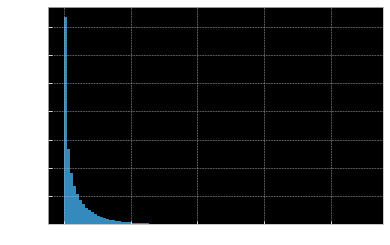

In [144]:
# Numpy bridge!
plt.hist(np.array(x), 100);

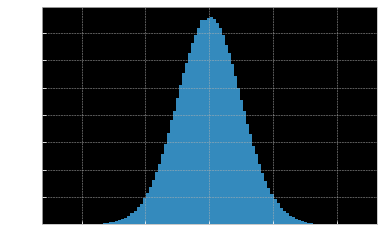

In [146]:
plt.hist(np.array(jax.random.normal(key=jax.random.PRNGKey(0), shape=(10**6,))), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

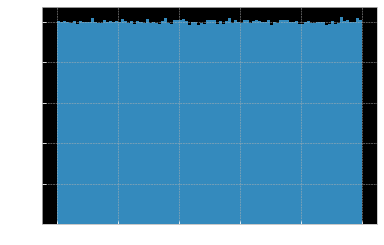

In [147]:
plt.hist(np.array(jax.random.uniform(key=jax.random.PRNGKey(0), shape=(10**6,))), 100);

## Casting

In [148]:
m

DeviceArray([[2., 5., 3., 7.],
             [4., 2., 1., 9.]], dtype=float32)

In [150]:
# This is basically a 64 bit float tensor
m_double = m.astype(jnp.double)
m_double

/tmp/ipykernel_145060/3536509595.py:2: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  m_double = m.astype(jnp.double)


DeviceArray([[2., 5., 3., 7.],
             [4., 2., 1., 9.]], dtype=float32)

In [152]:
# This creates a tensor of type int8
m_byte = m.astype(jnp.uint8)
m_byte

DeviceArray([[2, 5, 3, 7],
             [4, 2, 1, 9]], dtype=uint8)

## More fun

In [154]:
# Creates two tensor of size 1x4
a = jnp.array([[1, 2, 3, 4]])
b = jnp.array([[5, 6, 7, 8]], dtype=float)
print(a.shape, b)

(1, 4) [[5. 6. 7. 8.]]


In [156]:
# Concatenate on axis 0, so you get 2x4
jnp.concatenate((a, b), axis=0)

DeviceArray([[1., 2., 3., 4.],
             [5., 6., 7., 8.]], dtype=float32)

In [157]:
# Concatenate on axis 1, so you get 1x8
jnp.concatenate((a, b), 1)

DeviceArray([[1., 2., 3., 4., 5., 6., 7., 8.]], dtype=float32)